# Wrangling and Analysis of WeRateDog Twitter Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#store">Store</a></li>
<li><a href="#analysis">Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, i will be analysing data associated with the "We Rate Dogs" Twitter archive which contains over 5000 tweets, which have been filtered to create the enhanced twitter archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations. 


<a id='gather'></a>
## Gather

In [8]:
# import liberies and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import io
import os
import time
import datetime
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### 1. Twitter Archive Enhanced

In [9]:
# read and load the twitter archive enhanced file into the DataFrame
df_enhanced = pd.read_csv(r'C:\Users\JusticeAnnan\Desktop\AO Holdings\Online Learning\Udacity Data Analyst\Projects\Project 2\twitter_archive_enhanced.csv')

### 2. Image Prediction File

In [10]:
# download HTML (url) programmatically
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# save HTML to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

# read TSV file
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

### 3. Tweet JSON file

In [11]:
# Personal Twitter API Keys
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [12]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_enhanced.tweet_id.values
len(tweet_ids)

2356

In [13]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as tweetfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, tweetfile)
            tweetfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 3743


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Fail
1909: 674436901579923456
Fail
1910: 674422304705744896
Fail
1911: 674416750885273600
Fail
1912: 674410619106390016
Fail
1913: 674394782723014656
Fail
1914: 674372068062928900
Fail
1915: 674330906434379776
Fail
1916: 674318007229923329
Fail
1917: 674307341513269249
Fail
1918: 674291837063053312
Fail
1919: 674271431610523648
Fail
1920: 674269164442398721
Fail
1921: 674265582246694913
Fail
1922: 674262580978937856
Fail
1923: 674255168825880576
Fail
1924: 674082852460433408
Fail
1925: 674075285688614912
Fail
1926: 674063288070742018
Fail
1927: 674053186244734976
Fail
1928: 674051556661161984
Fail
1929: 674045139690631169
Fail
1930: 674042553264685056
Fail
1931: 674038233588723717
Fail
1932: 674036086168010753
Fail
1933: 674024893172875264
Fail
1934: 674019345211760640
Fail
1935: 674014384960745472
Fail
1936: 674008982932058114
Fail
1937: 673956914389192708
Fail
1938: 673919437611909120
Fail
1939: 673906403526995968
Fail
1940: 673887867907739649
Fail
1941: 673716320723169284
Fail
1942:

Fail
2200: 668779399630725120
Fail
2201: 668655139528511488
Fail
2202: 668645506898350081
Fail
2203: 668643542311546881
Fail
2204: 668641109086707712
Fail
2205: 668636665813057536
Fail
2206: 668633411083464705
Fail
2207: 668631377374486528
Fail
2208: 668627278264475648
Fail
2209: 668625577880875008
Fail
2210: 668623201287675904
Fail
2211: 668620235289837568
Fail
2212: 668614819948453888
Fail
2213: 668587383441514497
Fail
2214: 668567822092664832
Fail
2215: 668544745690562560
Fail
2216: 668542336805281792
Fail
2217: 668537837512433665
Fail
2218: 668528771708952576
Fail
2219: 668507509523615744
Fail
2220: 668496999348633600
Fail
2221: 668484198282485761
Fail
2222: 668480044826800133
Fail
2223: 668466899341221888
Fail
2224: 668297328638447616
Fail
2225: 668291999406125056
Fail
2226: 668286279830867968
Fail
2227: 668274247790391296
Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233:

In [65]:
# Extract the missing columns from twitter archive enhanced file

# Empty list to convert to Dataframe
df_list = []

# Open text file for reading
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string into a dictionary and read each line as a dictionary
        data = json.loads(line)
        # Extract variables from JSON data
        tweet_id = data['id']
        retwt_count = data['retweet_count']
        fav_count = data['favorite_count']
        
        df_list.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       })
        
tweet_json = pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count'])

<a id='assess'></a>
## Assess

#### df_enhanced

In [16]:
# showing the first 20 records of the df_enhanced table
df_enhanced.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
# showing the last 20 records of the df_enhanced table
df_enhanced.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


In [19]:
# taking a deep dive into the name column on the df_enhanced table
df_enhanced.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

In [23]:
# list all names that are NOT capitalized
small_names = df_enhanced[df_enhanced.name.str[0].str.islower()]
small_names.name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [24]:
# total number of uncapitalized names
len(small_names.name)

109

There are 109 tweets with invalid names or uncapitalized names

In [25]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
type(df_enhanced['timestamp'][0])

str

#### df_image

In [28]:
# showing the first 10 rows of the df_image table
df_image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [29]:
# showing the last 10 rows of the df_image table
df_image.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [30]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### tweet_json table

In [31]:
# displaying the first 10 rows of the tweet_json table
tweet_json.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,7009,33807
1,892177421306343426,5301,29330
2,891815181378084864,3481,22052
3,891689557279858688,7225,36938
4,891327558926688256,7760,35308
5,891087950875897856,2602,17812
6,890971913173991426,1663,10363
7,890729181411237888,15753,56866
8,890609185150312448,3620,24525
9,890240255349198849,6098,27962


In [32]:
# displaying the last 10 rows of the tweet_json table
tweet_json.tail(10)

,id,retweet_count,favorite_count
1775,676942428000112642,668,1878
1776,676936541936185344,4435,11630
1777,676916996760600576,1618,2697
1778,676897532954456065,649,2051
1779,676864501615042560,628,1903
1780,676821958043033607,13806,20745
1781,676819651066732545,602,1656
1782,676811746707918848,379,1306
1783,676776431406465024,1805,4532
1784,676617503762681856,855,2614


In [33]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              1785 non-null   int64
 1   retweet_count   1785 non-null   int64
 2   favorite_count  1785 non-null   int64
dtypes: int64(3)
memory usage: 42.0 KB


### Quality

#### df_enhanced table
1. The head() and tail() method above shows valid names and invalid names in the **name** column. The valid names are seen with the beginning letter being capitalized eg. Phineas, Tilly, Archie etc while the invalid names are all small letters. eg. a, an, the, etc.
2. Then **name** column also has 'None' values. (This will not be cleaned as I cannot get the names to replace them).
3. There are 78 replies in **in_reply_to_status_id** and **in_reply_to_user_id**
4. There are 181 retweets in **retweeted_status_id**, **retweeted_status_user_id**, and **retweeted_status_timestamp**.
5. The **timestamp** column is string.
6. There are 2297 values in **expanded_urls**.


#### df_image table
1. There are 2075 records in the df_image table which is less than the records in the df_enhanced table. 281 records are missing. This will be considered as missing data.


#### tweet_json table
1. There are 1785 records in the tweet_json table which is less than the records in the df_enhanced table. 571 records are missing. This will be considered as missing data.



### Tidiness

#### df_enhanced table
1. There are four columns for stages. They are **doggo**, **floofer**, **pupper**, and **puppo**.

#### df_image table
1. The dog breed image prediction table can be combined with the twitter archive enhanced table.
#### tweet_json table
1. The json_data table should be combined with the archive table.

<a id='clean'></a>
## Clean

In [34]:
# Create copies of the DataFrame for cleaning purposes
enhanced_clean = df_enhanced.copy()
image_clean = df_image.copy()
tweet_json_clean = tweet_json.copy()

#### Quality 
#### df_enhanced table

#### Define

- Replace all invalid names (lowercase) with the string 'None'

#### Code

In [35]:
mask = enhanced_clean.name.str.contains('^[a-z]', regex = True)
enhanced_clean[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [36]:
enhanced_clean.loc[mask, 'name'] = "None"

#### Test

In [37]:
# Invalid names (lowercase) were replaced with "None"
enhanced_clean[mask].name.value_counts().sort_index()

None    109
Name: name, dtype: int64

#### Define

- Drop all rows(78) that have replies in in_reply_to_status_id and in_reply_to_user_id column.

#### Code

In [41]:
# displaying values for in_reply_to_status_id
enhanced_clean.in_reply_to_status_id.notnull().sum()

78

In [42]:
# displaying values for in_reply_to_user_id
enhanced_clean.in_reply_to_user_id.notnull().sum()

78

In [43]:
# dropping values for in_reply_to_status_id and in_reply_to_user_id
enhanced_clean.drop(enhanced_clean[(enhanced_clean['in_reply_to_status_id'].notnull())].index, inplace=True)

#### Test

In [44]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

#### Define

- Drop all rows(181) that have retweets in **retweeted_status_id**, **retweeted_status_user_id**, and **retweeted_status_timestamp**.

#### Code

In [46]:
# displaying values for retweeted_status_id
enhanced_clean.retweeted_status_id.notnull().sum()

181

In [47]:
# dropping values for retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
enhanced_clean.drop(enhanced_clean[(enhanced_clean['retweeted_status_id'].notnull())].index, inplace=True)

#### Test

In [48]:
enhanced_clean.retweeted_status_id.notnull().sum()

0

In [49]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define

- Convert timestamp datatype form string to datetime datatype

#### Code

In [50]:
enhanced_clean['timestamp'] = pd.to_datetime(enhanced_clean.timestamp)
enhanced_clean['timestamp'] = enhanced_clean.timestamp.dt.floor('s')

#### Test

In [51]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

#### Define

- Drop tweets with missing data in expanded_urls

#### Code

In [52]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [53]:
enhanced_clean.drop(enhanced_clean[(enhanced_clean['expanded_urls'].isna())].index, inplace=True)

In [55]:
# drop columns with no data
enhanced_clean = enhanced_clean.drop(['in_reply_to_status_id',
                                     'in_reply_to_user_id', 
                                     'retweeted_status_id',
                                     'retweeted_status_user_id',
                                     'retweeted_status_timestamp'], axis = 1)

#### Test

In [56]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Tidiness

#### df_enhanced table

#### Define

- Combine the four columns (doggo, floofer, pupper, and puppo) into one column called stage.

#### Code

In [58]:
enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2094,2094,2094,2094
unique,2,2,2,2
top,None,None,None,None
freq,2011,2084,1865,2070


In [59]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
dummy = lambda x: 0 if x == 'None' else 1

enhanced_clean.doggo = enhanced_clean.doggo.apply(dummy)
enhanced_clean.floofer = enhanced_clean.floofer.apply(dummy)
enhanced_clean.pupper = enhanced_clean.pupper.apply(dummy)
enhanced_clean.puppo = enhanced_clean.puppo.apply(dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
enhanced_clean['none'] = enhanced_clean['doggo'] + enhanced_clean['floofer'] + \
                        enhanced_clean['pupper'] + enhanced_clean['puppo']

# have a look at what we have before we continue...
enhanced_clean['none'].value_counts()

0    1759
1     324
2      11
Name: none, dtype: int64

In [60]:
# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
enhanced_clean['none'] = enhanced_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (enhanced_clean[stage[0]] == 1),
    (enhanced_clean[stage[1]] == 1),
    (enhanced_clean[stage[2]] == 1),
    (enhanced_clean[stage[3]] == 1),
    (enhanced_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
enhanced_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
enhanced_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
enhanced_clean['stage'] = enhanced_clean.stage.astype('category')

#### Test

In [61]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   stage               2094 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 149.5+ KB


#### Define

- Combine the json_data table with the twitter archive enhanced table.

#### Code

In [62]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              1785 non-null   int64
 1   retweet_count   1785 non-null   int64
 2   favorite_count  1785 non-null   int64
dtypes: int64(3)
memory usage: 42.0 KB


In [67]:
# rename id to tweet_id
tweet_json_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

In [68]:
# merging the retweet_count and favorite_count to the twitter archive table on id
enhanced_clean = pd.merge(enhanced_clean, tweet_json_clean, 
                         on = 'tweet_id', how = 'left')

#### Test

In [69]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   stage               2094 non-null   category           
 9   retweet_count       1564 non-null   float64            
 10  favorite_count      1564 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 182.2+ KB

#### Define

- Combine the dog breed image prediction table  with the twitter archive enhanced table.

#### Code

In [76]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
# merging the image_clean to enhanced_clean
enhanced_clean = pd.merge(enhanced_clean, image_clean, 
                         on = 'tweet_id', how = 'left')

#### Test

In [78]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   stage               2094 non-null   category           
 9   retweet_count       1564 non-null   float64            
 10  favorite_count      1564 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [79]:
enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,7009.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,5301.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,3481.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,7225.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,7760.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Additional Cleaning

#### Define

- I will drop tweets with missing json data (retweet_count and favorite_count)
- This also address the quality issues with missing data in df_image and tweet_json tables.

#### Code

In [82]:
# display total number of tweets without retweet count
enhanced_clean.retweet_count.isna().sum()

530

In [83]:
# displaying tweets without retweet count and favorite count
mask_cols = ['tweet_id', 'retweet_count', 'favorite_count']
enhanced_clean[enhanced_clean.retweet_count.isna() | enhanced_clean.favorite_count.isna()][mask_cols]

,tweet_id,retweet_count,favorite_count
90,872261713294495745,NaN,NaN
202,844704788403113984,NaN,NaN
234,837366284874571778,NaN,NaN
284,829374341691346946,NaN,NaN
573,779123168116150273,NaN,NaN
...,...,...,...
2089,666049248165822465,NaN,NaN
2090,666044226329800704,NaN,NaN
2091,666033412701032449,NaN,NaN
2092,666029285002620928,NaN,NaN


In [84]:
enhanced_clean = enhanced_clean[~(enhanced_clean.retweet_count.isna() | enhanced_clean.favorite_count.isna())]

#### Test

In [85]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1564 non-null   int64              
 1   timestamp           1564 non-null   datetime64[ns, UTC]
 2   source              1564 non-null   object             
 3   text                1564 non-null   object             
 4   expanded_urls       1564 non-null   object             
 5   rating_numerator    1564 non-null   int64              
 6   rating_denominator  1564 non-null   int64              
 7   name                1564 non-null   object             
 8   stage               1564 non-null   category           
 9   retweet_count       1564 non-null   float64            
 10  favorite_count      1564 non-null   float64            
 11  jpg_url             1445 non-null   object             
 12  img_num             1445 non-null 

#### Define

- I will now go ahead to drop tweets without images

#### Code

In [86]:
# display total number of tweets without images
enhanced_clean.jpg_url.isna().sum()

119

In [87]:
# displaying tweets without images
mask_cols_image = ['tweet_id', 'jpg_url']
enhanced_clean[enhanced_clean.jpg_url.isna()][mask_cols_image]

,tweet_id,jpg_url
32,885518971528720385,NaN
38,884247878851493888,NaN
65,878604707211726852,NaN
73,876537666061221889,NaN
78,875097192612077568,NaN
...,...,...
1509,679001094530465792,NaN
1519,678708137298427904,NaN
1534,677961670166224897,NaN
1549,677335745548390400,NaN


In [89]:
enhanced_clean = enhanced_clean[~(enhanced_clean.jpg_url.isna())]

#### Test

In [90]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1445 non-null   int64              
 1   timestamp           1445 non-null   datetime64[ns, UTC]
 2   source              1445 non-null   object             
 3   text                1445 non-null   object             
 4   expanded_urls       1445 non-null   object             
 5   rating_numerator    1445 non-null   int64              
 6   rating_denominator  1445 non-null   int64              
 7   name                1445 non-null   object             
 8   stage               1445 non-null   category           
 9   retweet_count       1445 non-null   float64            
 10  favorite_count      1445 non-null   float64            
 11  jpg_url             1445 non-null   object             
 12  img_num             1445 non-null 

<a id='store'></a>
## Store Data

- The cleaned twitter archive data is now ready to be stored and analised on.

In [91]:
enhanced_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='analysis'></a>
## Analysis

- Below is how the clean data stored into **twitter_archive_master** has been analised.

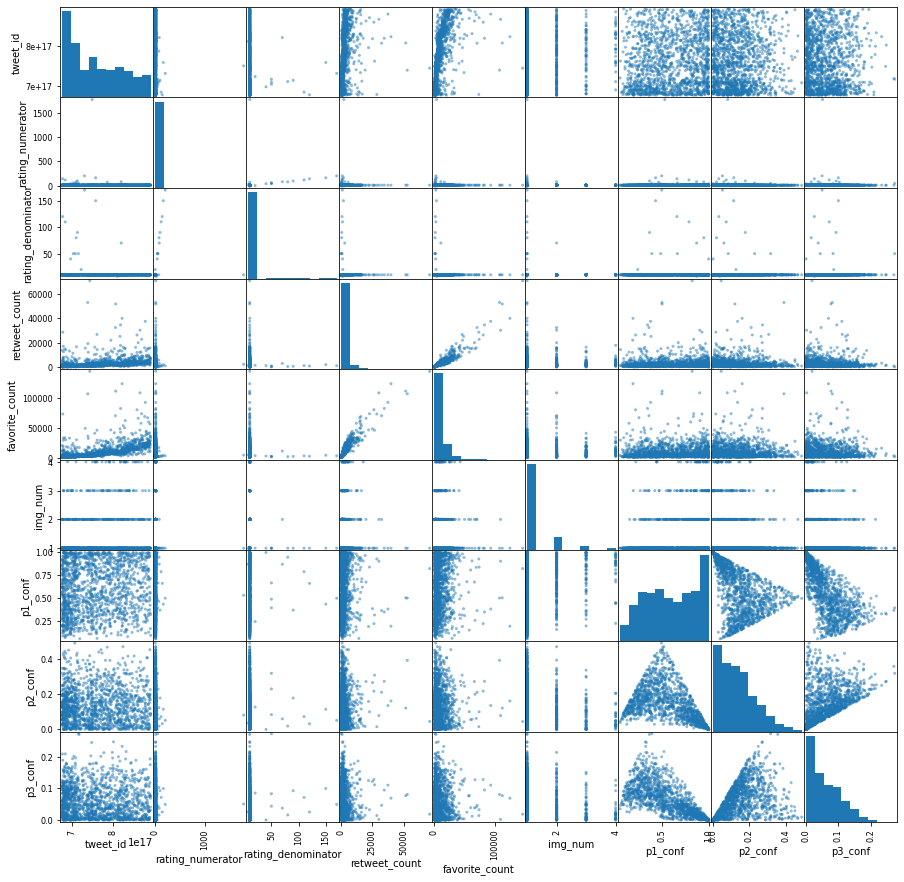

In [95]:
pd.plotting.scatter_matrix(enhanced_clean, figsize = (15,15));

The scatter plot above shows that there is a positive correlation between retweet_count and favorite_count

#### What is the correlation between Retweet and Favorite Count?

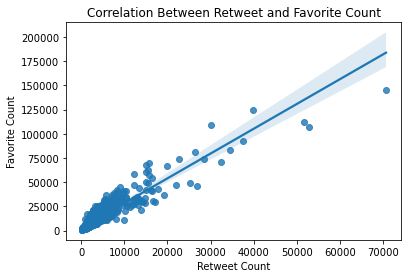

In [107]:
sns.regplot(x=enhanced_clean["retweet_count"], y=enhanced_clean["favorite_count"])
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Correlation Between Retweet and Favorite Count');
plt.show()

From the Correlation between retweet and favorite count, there is a linear relationship between the two variables. This indicate that there is a very positive correlation between them.

#### What is the most popular dog stage?

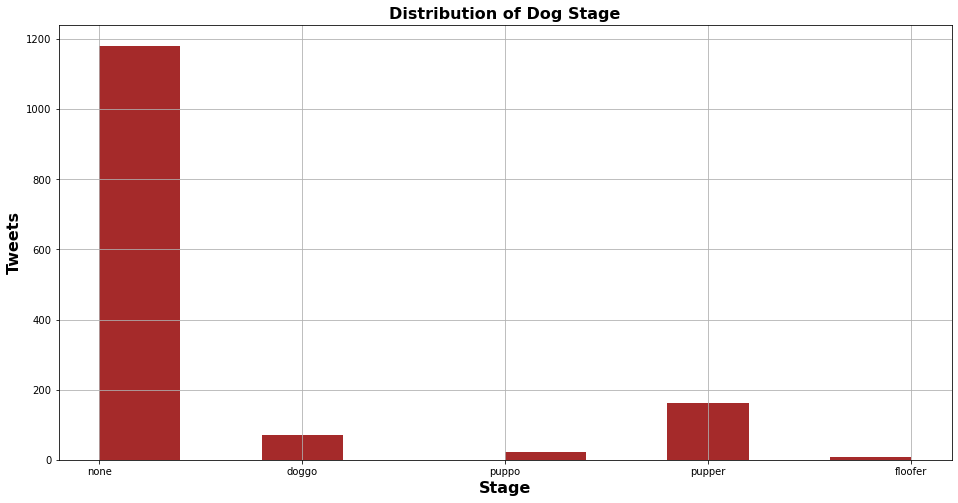

In [109]:
enhanced_clean.stage.hist(color='brown',figsize=(16,8))
plt.xlabel('Stage', fontsize=16, weight="bold")
plt.ylabel('Tweets', fontsize=16, weight="bold")
plt.title('Distribution of Dog Stage', fontsize=16, weight="bold");

- From the distribution diagram, one could clearly see that most tweets were without a dog stage. Irrespective of this, **pupper** stood out as the most popular dog stage.

#### What is the most retweeted tweet?

In [115]:
enhanced_clean.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
823,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,70742.0,...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
862,739238157791694849,2016-06-04 23:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,52908.0,...,1.0,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
418,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,none,51686.0,...,1.0,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
324,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,39925.0,...,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
60,879415818425184262,2017-06-26 19:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,none,37457.0,...,1.0,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True


- From the retweet_count column the most retweeted tweet has been retweeted 70,742 times.

#### What is the highest image number?

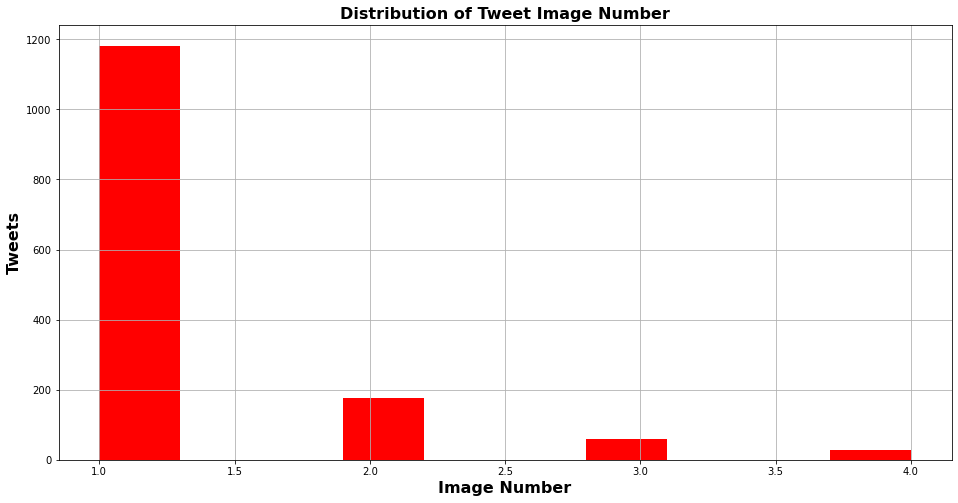

In [124]:
# distribution of tweet image number
enhanced_clean.img_num.hist(color='red',figsize=(16,8))
plt.xlabel('Image Number', fontsize=16, weight="bold")
plt.ylabel('Tweets', fontsize=16, weight="bold")
plt.title('Distribution of Tweet Image Number', fontsize=16, weight="bold");

- The distribution of tweet image number shows that image number 1 has the highest counts.

#### Insights

In [125]:
df_master = pd.read_csv(r'C:\Users\JusticeAnnan\Desktop\AO Holdings\Online Learning\Udacity Data Analyst\Projects\Project 2 proper\twitter_archive_master.csv')

In [126]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1.445000e+03
mean,7.590564e+17,12.986851,10.608304,2839.864360,9973.507958,1.262284,0.603561,0.134849,5.940509e-02
std,6.425750e+16,47.325029,7.783261,4452.396152,12335.139927,0.628057,0.268044,0.100483,5.022524e-02
min,6.766175e+17,0.000000,7.000000,92.000000,608.000000,1.000000,0.059033,0.000010,5.595040e-07
25%,6.994469e+17,10.000000,10.000000,866.000000,2879.000000,1.000000,0.371146,0.053515,1.610520e-02
50%,7.490368e+17,11.000000,10.000000,1623.000000,5746.000000,1.000000,0.605304,0.119475,4.846400e-02
75%,8.131574e+17,12.000000,10.000000,3145.000000,12483.000000,1.000000,0.850050,0.194742,9.214290e-02
max,8.924206e+17,1776.000000,170.000000,70742.000000,144893.000000,4.000000,0.999984,0.488014,2.734190e-01


- The minimum retweet count is 7, mean is 2839.86 and maximum is 70742
- The minimum favorite count is 608, mean is 9973.50 and maximum is 144893.
- All tweets have higher favorite count than retween count.

In [127]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1445 non-null   int64  
 1   timestamp           1445 non-null   object 
 2   source              1445 non-null   object 
 3   text                1445 non-null   object 
 4   expanded_urls       1445 non-null   object 
 5   rating_numerator    1445 non-null   int64  
 6   rating_denominator  1445 non-null   int64  
 7   name                1445 non-null   object 
 8   stage               1445 non-null   object 
 9   retweet_count       1445 non-null   float64
 10  favorite_count      1445 non-null   float64
 11  jpg_url             1445 non-null   object 
 12  img_num             1445 non-null   float64
 13  p1                  1445 non-null   object 
 14  p1_conf             1445 non-null   float64
 15  p1_dog              1445 non-null   bool   
 16  p2    

<a id='conclusion'></a>
## Conclusion

The focus of this project was on data wragling (gather, assess, and clean data into a tidy dataset). As a result, much time was spent on the data wragling processes and less time was spent on the analysis and visualisation stage. Notwithstanding this, further analysis can be carried out on this dataset.